## Notebook para análise do DB Campeonato Brasileiro
- Quantidade de passes: Há muitos valores zerados
- Precisao dos passes: Muitos dados em branco (NaN~=12000)
- Posse de bola: Muitos dados em branco (NaN~=9000)

In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import plotly.express as px

In [269]:
df_camp_br= pd.read_csv('campeonato-brasileiro-estatisticas-full.csv')
df_camp_br.head()

,partida_id,rodada,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0
1,1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0
2,2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0
3,2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0
4,3,1,Flamengo,0,0,NaN,0,NaN,0,0,0,0,0


In [270]:
df_camp_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   partida_id       15290 non-null  int64 
 1   rodada           15290 non-null  int64 
 2   clube            15290 non-null  object
 3   chutes           15290 non-null  int64 
 4   chutes_no_alvo   15290 non-null  int64 
 5   posse_de_bola    6078 non-null   object
 6   passes           15290 non-null  int64 
 7   precisao_passes  6078 non-null   object
 8   faltas           15290 non-null  int64 
 9   cartao_amarelo   15290 non-null  int64 
 10  cartao_vermelho  15290 non-null  int64 
 11  impedimentos     15290 non-null  int64 
 12  escanteios       15290 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.5+ MB


In [271]:
df_camp_br.describe()

,partida_id,rodada,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
count,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000
mean,3823.000000,20.196207,4.406082,1.049836,146.354938,5.291825,0.785873,0.042838,0.567953,1.801112
std,2206.993557,11.488873,6.702559,2.156661,209.141966,7.732749,1.366726,0.219844,1.184302,3.027748
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1912.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3823.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5734.000000,30.000000,10.000000,0.000000,360.000000,12.000000,1.000000,0.000000,1.000000,3.000000
max,7645.000000,46.000000,37.000000,16.000000,848.000000,34.000000,10.000000,3.000000,10.000000,23.000000


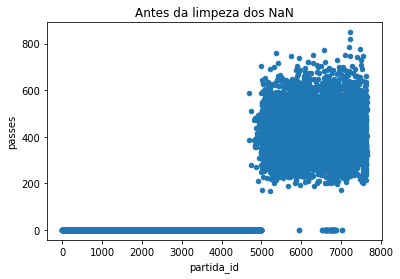

In [272]:
df_camp_br.plot(x='partida_id', y='passes', kind='scatter', title='Antes da limpeza dos NaN');

In [273]:
from numpy import NaN
df_camp_br.mask(df_camp_br == 'None', NaN, inplace=True)
df_camp_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   partida_id       15290 non-null  int64 
 1   rodada           15290 non-null  int64 
 2   clube            15290 non-null  object
 3   chutes           15290 non-null  int64 
 4   chutes_no_alvo   15290 non-null  int64 
 5   posse_de_bola    5300 non-null   object
 6   passes           15290 non-null  int64 
 7   precisao_passes  2992 non-null   object
 8   faltas           15290 non-null  int64 
 9   cartao_amarelo   15290 non-null  int64 
 10  cartao_vermelho  15290 non-null  int64 
 11  impedimentos     15290 non-null  int64 
 12  escanteios       15290 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.5+ MB


In [274]:
df_camp_br= df_camp_br.dropna(axis=0,how='any')

In [275]:
df_camp_br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2992 entries, 12250 to 15289
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   partida_id       2992 non-null   int64 
 1   rodada           2992 non-null   int64 
 2   clube            2992 non-null   object
 3   chutes           2992 non-null   int64 
 4   chutes_no_alvo   2992 non-null   int64 
 5   posse_de_bola    2992 non-null   object
 6   passes           2992 non-null   int64 
 7   precisao_passes  2992 non-null   object
 8   faltas           2992 non-null   int64 
 9   cartao_amarelo   2992 non-null   int64 
 10  cartao_vermelho  2992 non-null   int64 
 11  impedimentos     2992 non-null   int64 
 12  escanteios       2992 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 327.2+ KB


C:\Users\grego\AppData\Local\Temp\ipykernel_7632\2160555777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_camp_br.mask(df_camp_br == 'None', np.nan, inplace=True)


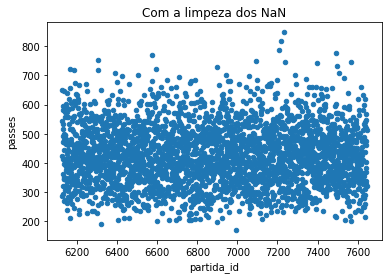

In [276]:
df_camp_br.mask(df_camp_br == 'None', np.nan, inplace=True)
df_camp_br.plot(x='partida_id', y='passes', kind='scatter', title='Com a limpeza dos NaN');

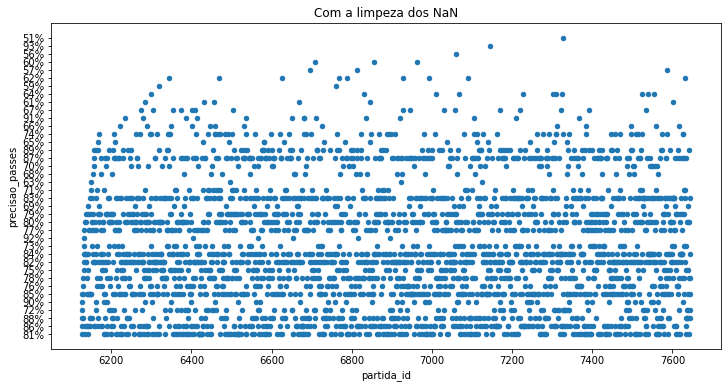

In [277]:
df_camp_br.plot(x='partida_id', y='precisao_passes', kind='scatter',figsize=(12,6), title='Com a limpeza dos NaN');

In [278]:
df_precisao_passes = df_camp_br['precisao_passes'].copy()
df_precisao_passes.sort_values(inplace=True)
df_camp_br['precisao_passes']

12250    81%
12251    86%
12252    88%
12253    72%
12254    90%
        ... 
15285    85%
15286    83%
15287    88%
15288    84%
15289    72%
Name: precisao_passes, Length: 2992, dtype: object

In [279]:
df_camp_br['precisao_passes'].sort_values()

14650    51%
14117    56%
13389    57%
13626    57%
15171    57%
        ... 
13628    92%
12804    92%
13306    92%
13790    92%
14290    93%
Name: precisao_passes, Length: 2992, dtype: object